In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,10)

%matplotlib inline

In [2]:
os.listdir('.')

['output_15_3.png',
 'sensitivity_plot.ipynb',
 'exclusion_version',
 'output_21_1.png',
 'notebook.tex',
 'changing_kaut',
 '.ipynb_checkpoints',
 'output_21_2.png',
 'output_15_1.png',
 'dsim.info',
 'output_8_0.png',
 'Figures',
 'model_io',
 'sensitivities.txt',
 'output_28_1.png',
 'output_28_2.png',
 'results.txt',
 'output_21_0.png',
 'output_21_3.png',
 'output_8_2.png',
 'output_8_3.png',
 'output_28_3.png',
 'output_15_2.png',
 'output_15_0.png',
 'output_28_0.png',
 'exc_kaut',
 'output_8_1.png']

## Sensitivities with variable k_aut with healthy data

In [3]:
df = pd.read_csv('changing_kaut/healthy/sensitivities.txt', sep='\t')

In [4]:
df.shape

(121, 17)

In [5]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [6]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [7]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/varying_kaut/healthy/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

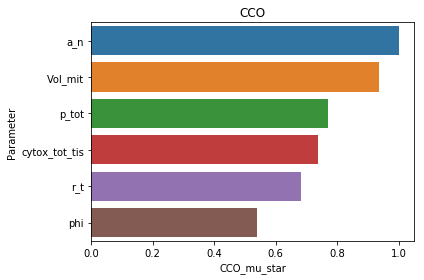

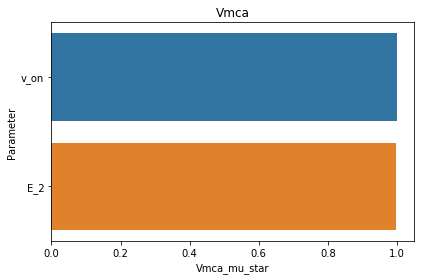

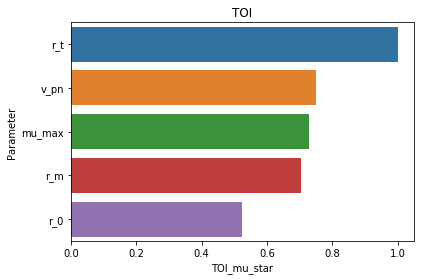

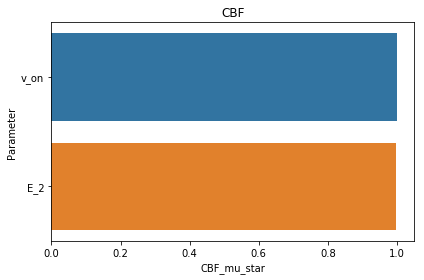

In [8]:
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    sensitivity(df, o)


## Sensitivities with variable k_aut with impaired data

In [9]:
df = pd.read_csv('changing_kaut/impaired/sensitivities.txt', sep='\t')

In [10]:
df.shape

(121, 17)

In [11]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [12]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [13]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/varying_kaut/impaired/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

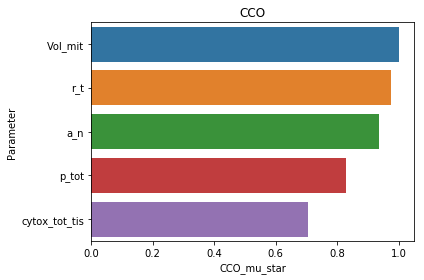

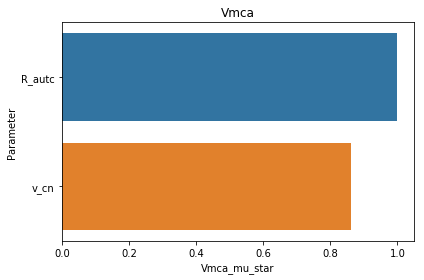

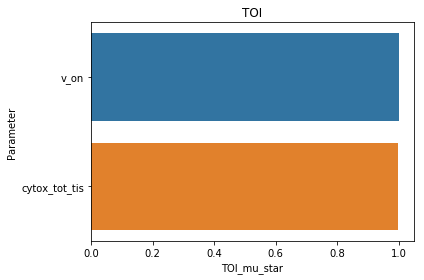

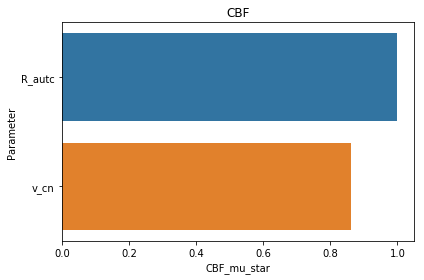

In [14]:
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    sensitivity(df, o)


## Sensitivities for constant k_aut

In [15]:
df = pd.read_csv('exc_kaut/k_Aut_1/sensitivities.txt', sep='\t')

In [16]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [17]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2',"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(120, 17)

In [18]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/kaut_1_0/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

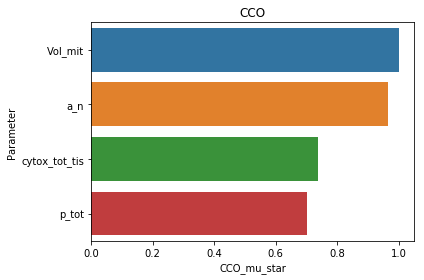

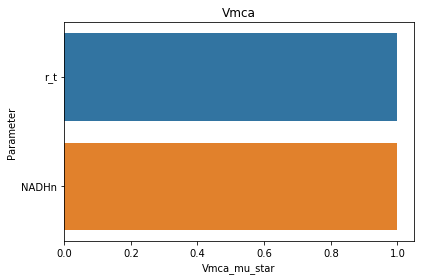

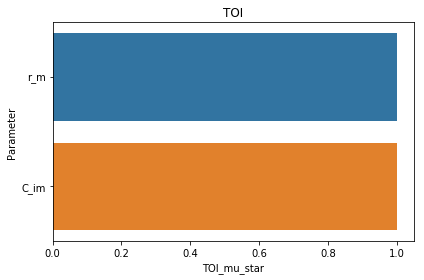

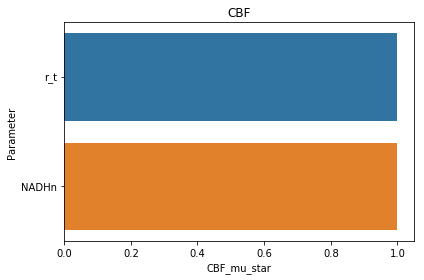

In [19]:
normed_dfs = {}
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm = sensitivity(df, o)
    normed_dfs[o]=df_norm

## k_Aut fixed in range around 0.7

In [20]:
df = pd.read_csv('exc_kaut/k_Aut_0_7/sensitivities.txt', sep='\t')

In [21]:
df.sort_values(by="TOI_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
94,sigma_coll,-10.417856,18.331332,67.576797,12.703168,74002.004219,77508.644328,635351.057427,126657.883189,471.742086,483.244160,4751.137563,913.118721,2.358710e+06,2.416221e+06,2.375569e+07,4.632944e+06
83,r_0,-16.303321,38.094559,88.328824,15.991410,19918.081926,46200.472660,223629.916663,43459.015482,1.367598,3.296348,16.494767,3.129898,6.837990e+03,1.648174e+04,8.247384e+04,1.619685e+04
60,n_m,0.187677,18.741039,61.602536,11.941120,44337.604837,44651.420316,412791.935306,80437.300990,-0.351892,0.654454,3.539535,0.686318,-1.759459e+03,3.272269e+03,1.769768e+04,3.316989e+03
72,P_ic,3.347771,11.964386,50.469527,9.875663,-22350.300655,38126.451129,233078.087748,44429.073999,-3.846787,4.070236,33.491404,6.533027,-1.923394e+04,2.035118e+04,1.674570e+05,3.212312e+04
89,r_m,-6.009196,37.095231,87.520636,15.489419,-12701.358668,37912.124201,190439.925891,38320.725467,1.773294,2.318210,14.466876,2.848801,8.866472e+03,1.159105e+04,7.233438e+04,1.399943e+04
34,h_0,5.439598,11.031922,47.745221,9.435784,-3084.402443,28782.033975,176018.315800,32578.506852,1.102183,1.228974,10.506855,2.082216,5.510916e+03,6.144872e+03,5.253428e+04,9.655343e+03
84,R_autc,-4.778868,13.579532,57.443368,10.673011,5755.194132,20259.045038,119275.739381,21832.722740,-563.762623,564.154744,5637.325235,1102.005861,-2.818813e+06,2.820774e+06,2.818663e+07,5.209535e+06
91,r_t,-55.412820,77.829196,120.274741,20.717194,12081.729151,18716.936907,83050.918625,15895.346355,-445.862531,505.455550,4758.684374,907.693096,-2.229313e+06,2.527278e+06,2.379342e+07,4.579828e+06
74,p_tot,-10.985767,75.186689,132.411209,21.451378,-16624.938562,18098.899922,172269.433270,33365.398702,-28.164362,28.220448,280.854732,51.538914,-1.408218e+05,1.411022e+05,1.404274e+06,2.541111e+05
115,Xtot,-7.146901,15.283994,43.501162,7.790906,8742.297469,16967.438182,116784.820456,23311.600467,-0.018915,0.108395,0.498273,0.094004,-9.457450e+01,5.419745e+02,2.491367e+03,4.807775e+02


In [22]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [23]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2',"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(120, 17)

In [24]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    #x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/kaut_0_7/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

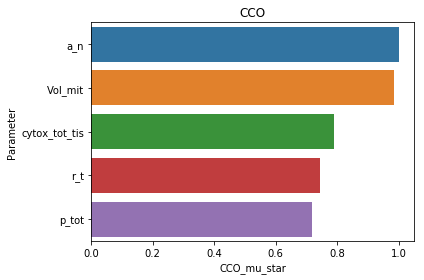

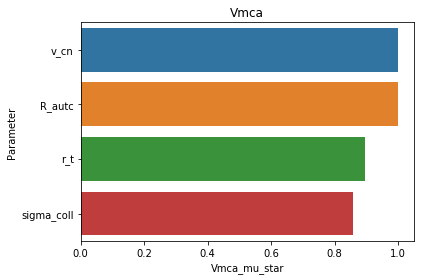

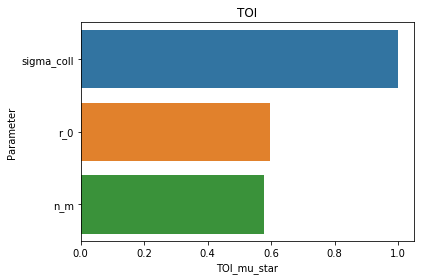

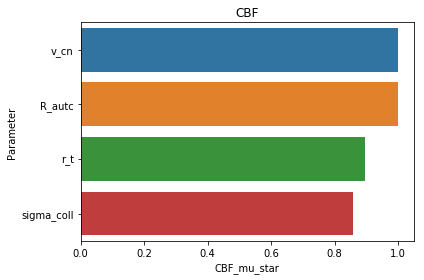

In [25]:
normed_dfs = {}
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm = sensitivity(df, o)
    normed_dfs[o]=df_norm